In [1]:
import numpy as np
import pandas as pd
import scanpy as sc
import scipy
import os
import scipy.io as sio
import anndata
import matplotlib.pyplot as plt
import seaborn as sns

data_path = 'split_DGE/'

sc.settings.verbosity = 1 # verbosity: errors (0), warnings (1), info (2), hints (3)
sc.settings.set_figure_params(dpi=100, fontsize=10, dpi_save=300, figsize=(5,4), format='png')
sc.settings.figdir = 'scanpy-figures-D4-ovaroids'

In [2]:
diff_key = pd.read_csv("ovaroid_diff_key.csv")
diff_key

,sample,Sample Name,Day,Granulosa,Germ,RA
0,1mil-1,D4 Granulosas,0,D4,None,0
1,1mil-2,CD82+/EPCAM- sorted Polyclonal granulosa,0,Sorted_F66,F2,0
2,1mil-3,CD82+/EPCAM- sorted Polyclonal Ovaroid with F2...,2,Sorted_F66,F2,0
3,1mil-4,D4 Ovaroid with F2 LTC hPGCLCs + SCF + Dox d2,2,D4,F2,0
4,1mil-5,D4 Ovaroid with F2 LTC hPGCLCs + SCF + Dox + R...,2,D4,F2,1
5,1mil-6,CD82+/EPCAM- sorted Polyclonal Ovaroid with F2...,4,Sorted_F66,F2,0
6,1mil-7,D4 Ovaroid with F2 LTC hPGCLCs + SCF + Dox d4,4,D4,F2,0
7,1mil-8,D4 Ovaroid with F2 LTC hPGCLCs + SCF + Dox + R...,4,D4,F2,1
8,1mil-9,CD82+/EPCAM- sorted Polyclonal Ovaroid with F2...,8,Sorted_F66,F2,0
9,1mil-10,D4 Ovaroid with F2 LTC hPGCLCs + SCF + Dox d8,8,D4,F2,0


In [3]:
# reading in gene and cell data
gene_data = pd.read_csv('all_genes.csv')

sample_list = ['4','5','7','8','10','11','13','14']#,]

cell_meta = pd.concat([pd.read_csv(data_path + '1mil-'+ i +'_cell_metadata.csv') for i in sample_list])
cell_meta

,bc_wells,sample,species,gene_count,tscp_count,tscp_count_50dup,read_count,bc1_well,bc2_well,bc3_well,bc1_wind,bc2_wind,bc3_wind
0,04_56_67__s1,1mil-4,hg38,7839,31001,37343.95,52844,A4,E8,F7,4,56,67
1,04_57_93__s1,1mil-4,hg38,3864,16331,19672.40,29038,A4,E9,H9,4,57,93
2,04_78_27__s1,1mil-4,hg38,5668,14688,17693.23,25386,A4,G6,C3,4,78,27
3,04_39_83__s1,1mil-4,hg38,4656,11496,13848.14,19944,A4,D3,G11,4,39,83
4,04_93_53__s1,1mil-4,hg38,4315,9835,11847.29,16989,A4,H9,E5,4,93,53
...,...,...,...,...,...,...,...,...,...,...,...,...,...
2353,14_78_53__s16,1mil-14,hg38,1,1,2.40,1,B2,G6,E5,14,78,53
2354,14_79_03__s16,1mil-14,hg38,1,1,2.40,1,B2,G7,A3,14,79,3
2355,14_79_15__s16,1mil-14,hg38,1,1,2.40,2,B2,G7,B3,14,79,15
2356,14_79_33__s16,1mil-14,hg38,1,1,2.40,1,B2,G7,C9,14,79,33


In [4]:
# The DGE_filtered folder contains the expression matrix, genes, and files 
adata = anndata.concat([sc.read_mtx(data_path + '1mil-'+i+'.mtx.gz') for i in sample_list], axis = 0)
#adata.raw = adata
adata.shape

/Users/merrickpiersonsmela/anaconda3/lib/python3.7/site-packages/anndata/_core/anndata.py:1828: UserWarning: Observation names are not unique. To make them unique, call `.obs_names_make_unique`.
  utils.warn_names_duplicates("obs")


(15888, 60664)

In [5]:
# add cell meta data to anndata object
adata.obs = cell_meta
adata.obs.set_index('bc_wells', inplace=True)
adata.obs.index.name = None
adata.obs_names_make_unique()

/Users/merrickpiersonsmela/anaconda3/lib/python3.7/site-packages/anndata/_core/anndata.py:798: UserWarning: 
AnnData expects .obs.index to contain strings, but got values like:
    [0, 1, 2, 3, 4]

    Inferred to be: integer

  value_idx = self._prep_dim_index(value.index, attr)


In [6]:
#add sample info
adata.obs = adata.obs.merge(diff_key, on = 'sample', how = 'left')
adata.obs.index = adata.obs.index.map(str)
adata.obs

,sample,species,gene_count,tscp_count,tscp_count_50dup,read_count,bc1_well,bc2_well,bc3_well,bc1_wind,bc2_wind,bc3_wind,Sample Name,Day,Granulosa,Germ,RA
0,1mil-4,hg38,7839,31001,37343.95,52844,A4,E8,F7,4,56,67,D4 Ovaroid with F2 LTC hPGCLCs + SCF + Dox d2,2,D4,F2,0
1,1mil-4,hg38,3864,16331,19672.40,29038,A4,E9,H9,4,57,93,D4 Ovaroid with F2 LTC hPGCLCs + SCF + Dox d2,2,D4,F2,0
2,1mil-4,hg38,5668,14688,17693.23,25386,A4,G6,C3,4,78,27,D4 Ovaroid with F2 LTC hPGCLCs + SCF + Dox d2,2,D4,F2,0
3,1mil-4,hg38,4656,11496,13848.14,19944,A4,D3,G11,4,39,83,D4 Ovaroid with F2 LTC hPGCLCs + SCF + Dox d2,2,D4,F2,0
4,1mil-4,hg38,4315,9835,11847.29,16989,A4,H9,E5,4,93,53,D4 Ovaroid with F2 LTC hPGCLCs + SCF + Dox d2,2,D4,F2,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
15883,1mil-14,hg38,1,1,2.40,1,B2,G6,E5,14,78,53,D4 Ovaroid with F2 LTC hPGCLCs + SCF + Dox + R...,14,D4,F2,1
15884,1mil-14,hg38,1,1,2.40,1,B2,G7,A3,14,79,3,D4 Ovaroid with F2 LTC hPGCLCs + SCF + Dox + R...,14,D4,F2,1
15885,1mil-14,hg38,1,1,2.40,2,B2,G7,B3,14,79,15,D4 Ovaroid with F2 LTC hPGCLCs + SCF + Dox + R...,14,D4,F2,1
15886,1mil-14,hg38,1,1,2.40,1,B2,G7,C9,14,79,33,D4 Ovaroid with F2 LTC hPGCLCs + SCF + Dox + R...,14,D4,F2,1


In [7]:
# find genes with nan values and filter
gene_data = gene_data[gene_data.gene_name.notnull()]
notNa = gene_data.index
notNa = notNa.to_list()

# remove genes with nan values and assign gene names
adata = adata[:,notNa]
adata.var = gene_data
adata.var.set_index('gene_name', inplace=True)
adata.var.index.name = None
adata.var_names_make_unique()

/Users/merrickpiersonsmela/anaconda3/lib/python3.7/site-packages/anndata/_core/anndata.py:798: UserWarning: 
AnnData expects .var.index to contain strings, but got values like:
    [0, 1, 2, 3, 4]

    Inferred to be: integer

  value_idx = self._prep_dim_index(value.index, attr)
/Users/merrickpiersonsmela/anaconda3/lib/python3.7/site-packages/anndata/utils.py:117: UserWarning: Suffix used (-[0-9]+) to deduplicate index values may make index values difficult to interpret. There values with a similar suffixes in the index. Consider using a different delimiter by passing `join={delimiter}`Example key collisions generated by the make_index_unique algorithm: ['SNORD115-1', 'SNORD115-2', 'SNORD115-3', 'SNORD115-4', 'SNORD115-5']
  + str(example_colliding_values)


In [8]:
sc.pp.filter_cells(adata, min_genes=1000)
sc.pp.filter_genes(adata, min_cells=5)

# Returns the dimensions of the expression matrix (cells, genes)
adata.shape

(13117, 22622)

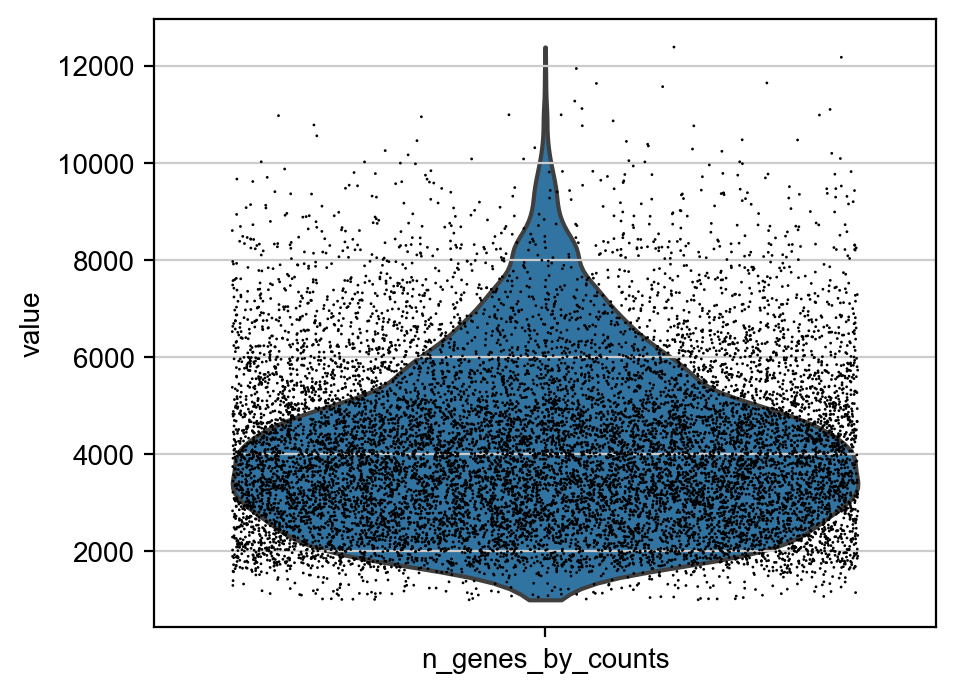

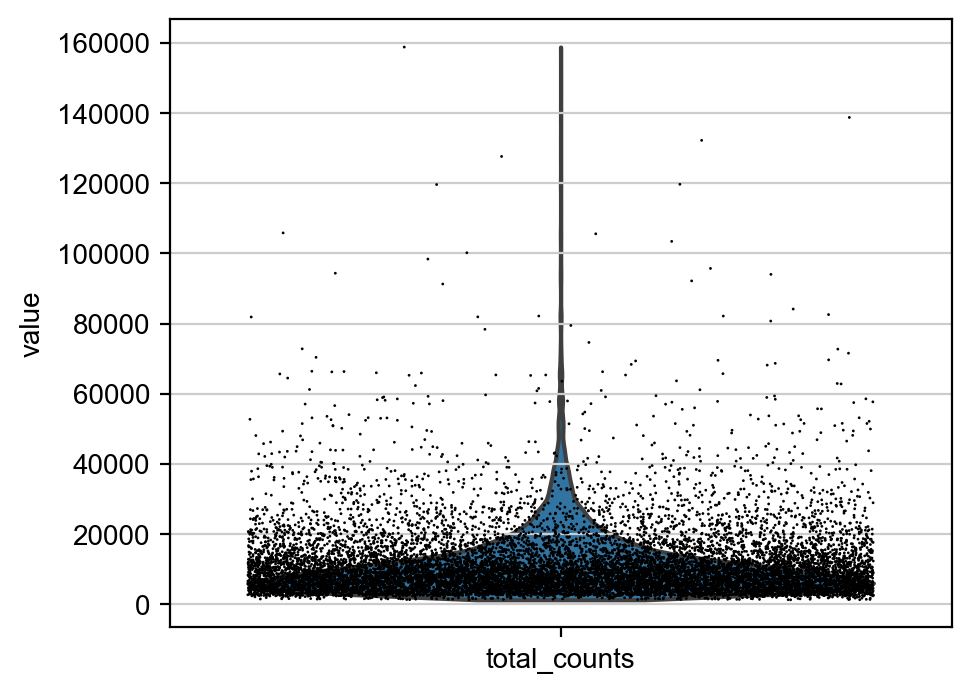

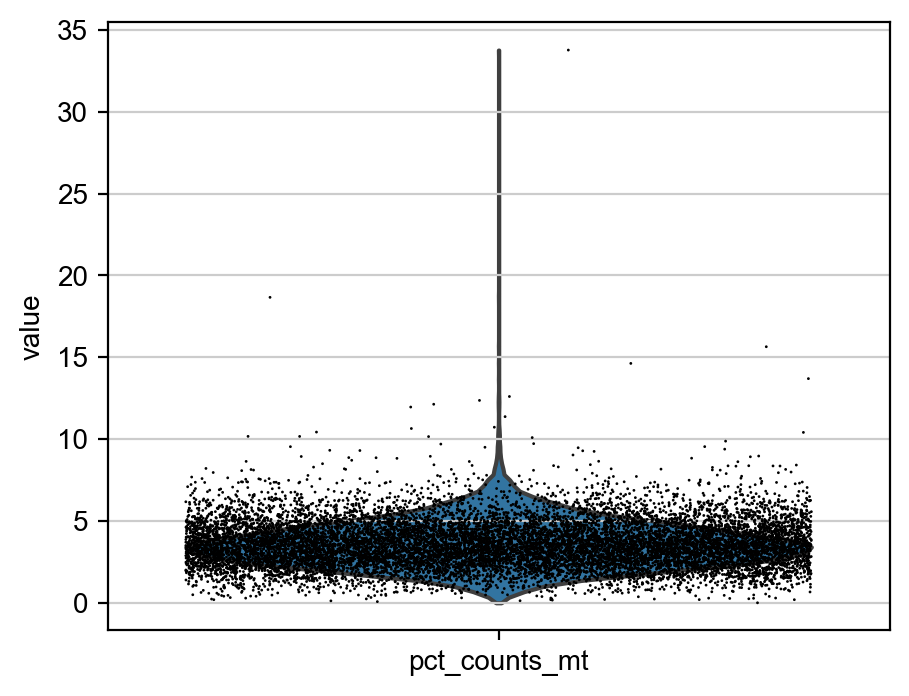

In [9]:
#Check for too many mitochondrial genes
adata.var['mt'] = adata.var_names.str.startswith('MT-')
sc.pp.calculate_qc_metrics(adata, qc_vars=['mt'], percent_top=None, log1p=False, inplace=True)

# Scanpy will prepend the string in the save argument with "violin"
# and save it to our figure directory defined in the first step.
sc.pl.violin(adata, ['n_genes_by_counts'], save='_n_genes', jitter=0.4)
sc.pl.violin(adata, ['total_counts'], save='_total_counts', jitter=0.4)
#plt.ylim([0,100000])
sc.pl.violin(adata, ['pct_counts_mt'], save='_mito_pct', jitter=0.4)

In [10]:
# Filter the data
adata = adata[adata.obs.n_genes_by_counts < 6250,:]
adata = adata[adata.obs.total_counts < 40000,:]
adata = adata[adata.obs.pct_counts_mt < 10,:]
adata.shape # Checking number of cells remaining

(11571, 22622)

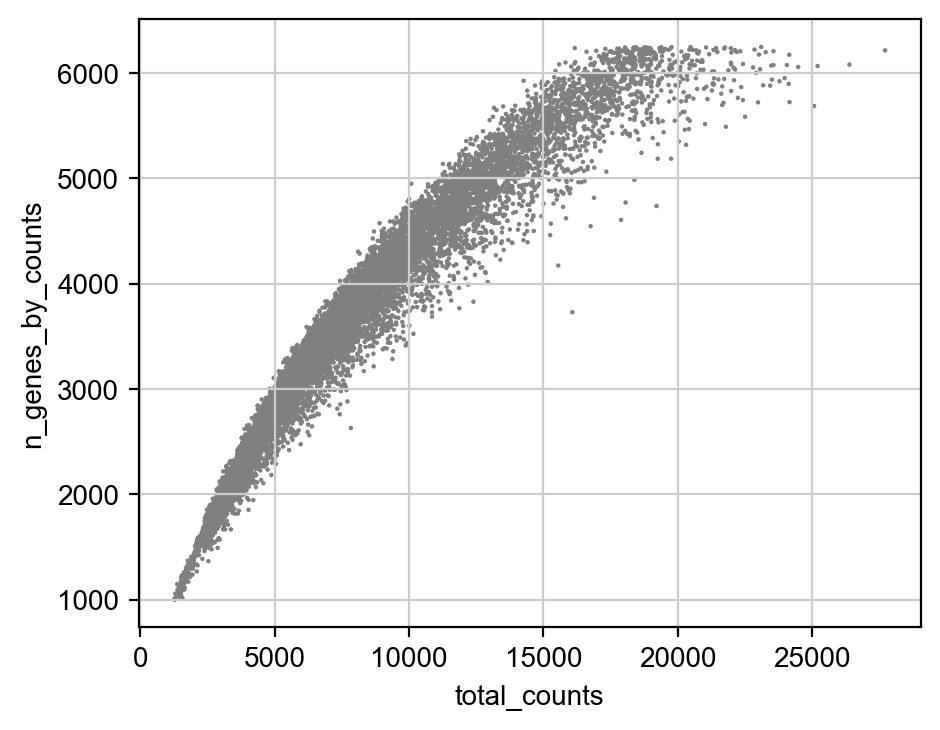

median transcript count per cell: 7888.0
median gene count per cell: 3804.0


In [11]:
#Visualize QC
sc.pl.scatter(adata, x='total_counts', y='n_genes_by_counts', save='_gene_vs_transcript_counts')
print('median transcript count per cell: ' + str(adata.obs['tscp_count'].median(0)))
print('median gene count per cell: ' + str(adata.obs['gene_count'].median(0)))

In [12]:
#CPM normalize
sc.pp.normalize_total(adata, target_sum=1e6)
sc.pp.log1p(adata)

adata.raw = adata #Save raw CPMs for plotting

/Users/merrickpiersonsmela/anaconda3/lib/python3.7/site-packages/scanpy/preprocessing/_normalization.py:155: UserWarning: Revieved a view of an AnnData. Making a copy.
  view_to_actual(adata)


In [13]:
#Identify highly variable genes and regress out transcript counts

#NOTE: DON'T remove non-variable genes. Just regress out the counts. Otherwise the DEG analysis doesn't work.

#sc.pp.highly_variable_genes(adata, min_mean=0.0125, max_mean=8, min_disp=0.25)
#sc.pl.highly_variable_genes(adata, save='') # scanpy generates the filename automatically
#adata = adata[:, adata.var.highly_variable]
sc.pp.regress_out(adata, ['total_counts'])
sc.pp.scale(adata, max_value=10)

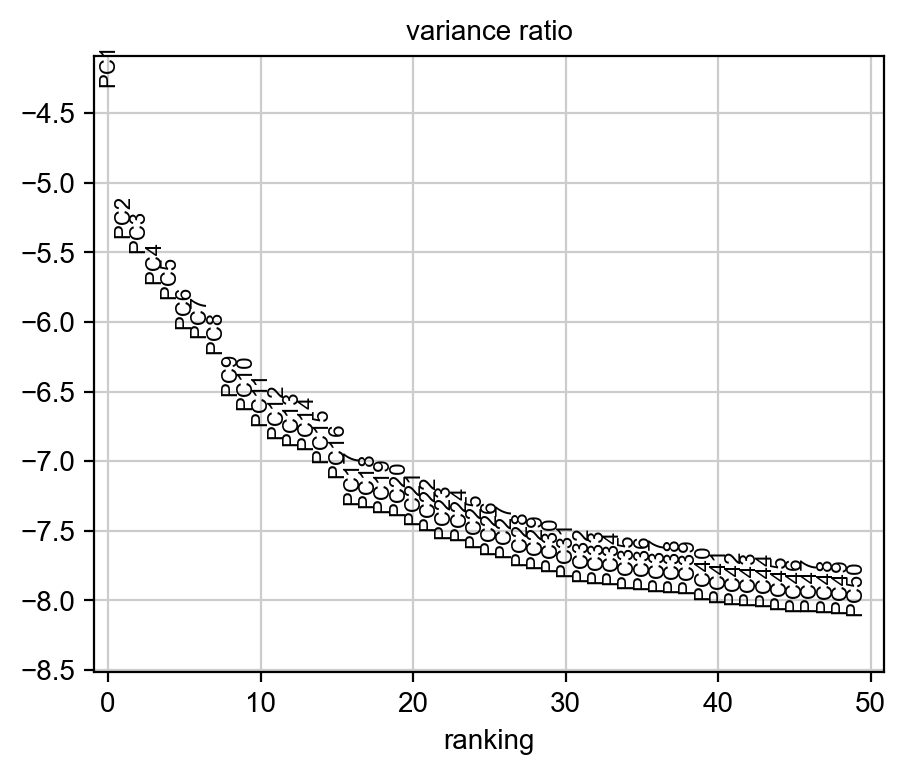

In [14]:
#PCA
sc.tl.pca(adata, svd_solver='arpack')
sc.pl.pca_variance_ratio(adata, log=True, n_pcs=50, save='') # scanpy generates the filename automatically

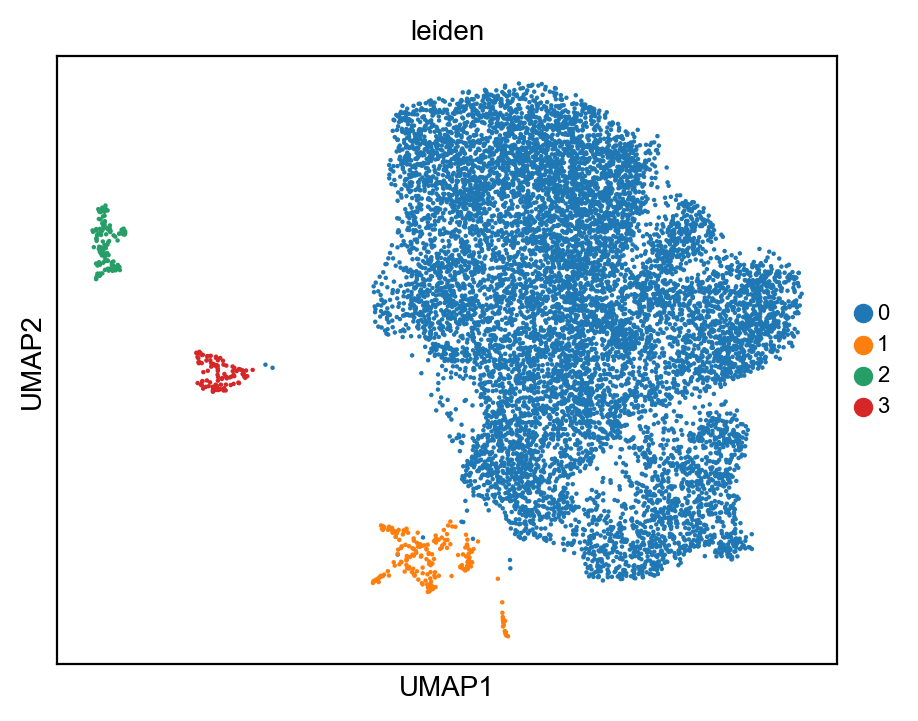

In [15]:
#Clustering
#sc.settings.figdir = 'scanpy-figures-sorted1F'
sc.pp.neighbors(adata, n_neighbors=10, n_pcs=30)
sc.tl.umap(adata)
sc.tl.leiden(adata, resolution=0.05)
sc.pl.umap(adata, color=['leiden'], legend_fontsize=8, save='_leiden005_regress.svg')

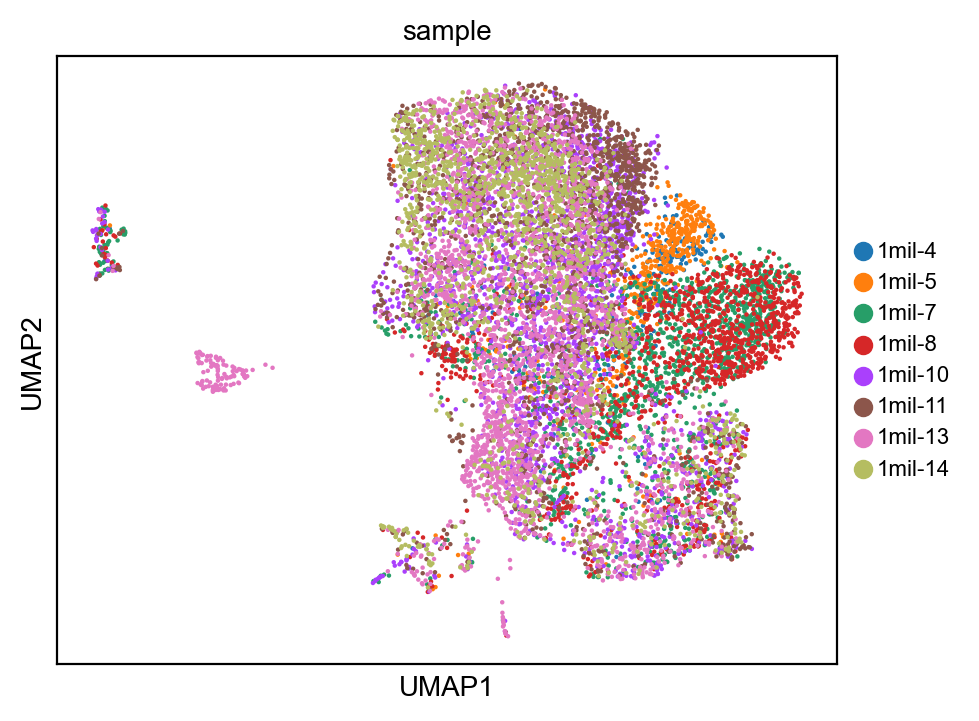

In [16]:
sc.pl.umap(adata, color=['sample'], legend_fontsize=8, save='_sample_regress')

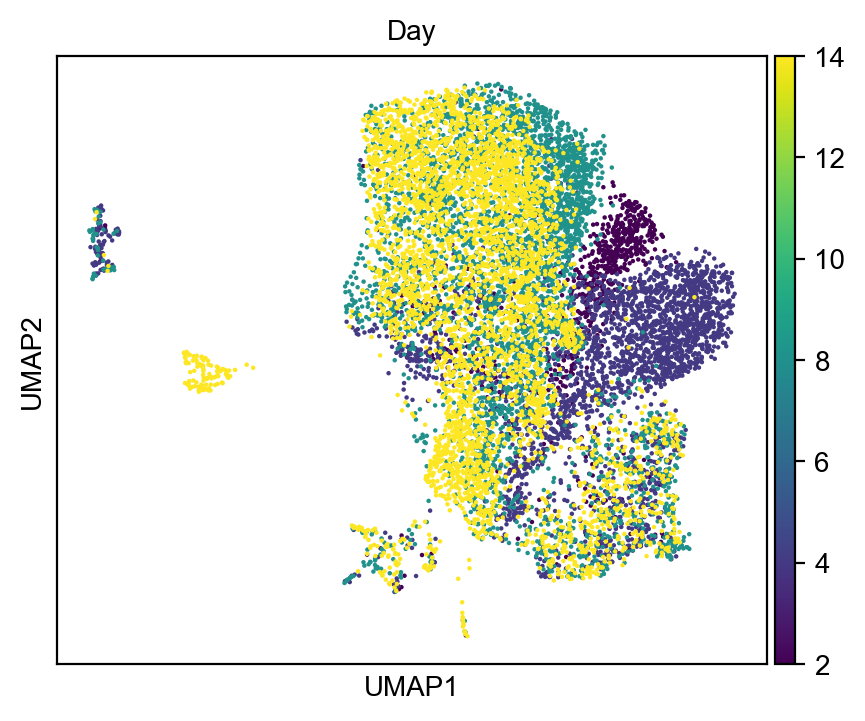

In [17]:
sc.pl.umap(adata, color=['Day'], legend_fontsize=8, save='_Day_regress')

In [18]:
#Rank markers by cluster
sc.tl.rank_genes_groups(adata, 'leiden', method='t-test')

# The head function returns the top n genes per cluster
top_markers = pd.DataFrame(adata.uns['rank_genes_groups']['names']).head(15)
print(top_markers)
top_markers.to_csv(os.path.join(sc.settings.figdir,"2022-06-07_D4_ovaroids_top_markers_regress.csv"))

          0         1          2        3
0     OSTM1  KIAA1217  MIR548XHG   COL3A1
1      RGS9      PBX1       XACT     BNC2
2   FAM153A      UTRN        DMD     SOX6
3     FOXL2     LAMB1      TRPC5   COL1A2
4   FAM153B     MEIS2    COL23A1    FGFR2
5     CDH23     PDE4D   CACNA2D3  ARHGAP6
6     ABCC6     EFNA5      ACOXL   COL1A1
7     GRIK5   SLC38A1     DIAPH2     SOX5
8   MAP3K15    CASC15     CASC15    SLIT3
9     NR5A1     MAML3     PCAT14  COLEC12
10    ABCG1    PLXDC2      GNA14   PDZRN3
11    SSC4D     PTPRK    FAM155A   COL5A1
12     RGL3    ADGRL2      TENM3    SLIT2
13    KIF1A      MID1     GABRA3    SPARC
14    OSBP2     ROBO1       FMN2    MEIS2


In [20]:
#Save the gene ranking for each cluster
names_df = pd.DataFrame(adata.uns['rank_genes_groups']['names'])

scores_df = pd.DataFrame(adata.uns['rank_genes_groups']['scores'])

pvals_adj_df = pd.DataFrame(adata.uns['rank_genes_groups']['pvals_adj'])

fc_df = pd.DataFrame(adata.uns['rank_genes_groups']['logfoldchanges'])

for i in range(0,3):
    j = str(i)
    cluster_df = pd.concat((names_df[j],scores_df[j],fc_df[j],pvals_adj_df[j]),axis = 1, keys = ('Gene name', 'score','logfc','p_adj'))
    cluster_df.to_csv(os.path.join(sc.settings.figdir,"2022-06-07_D4_ovaroids_cluster_"+j+".csv"))

In [21]:
#Rank markers by sample
#sc.tl.rank_genes_groups(adata, 'sample', method='t-test')

# The head function returns the top n genes per sample
#top_markers = pd.DataFrame(adata.uns['rank_genes_groups']['names']).head(15)
#print(top_markers)

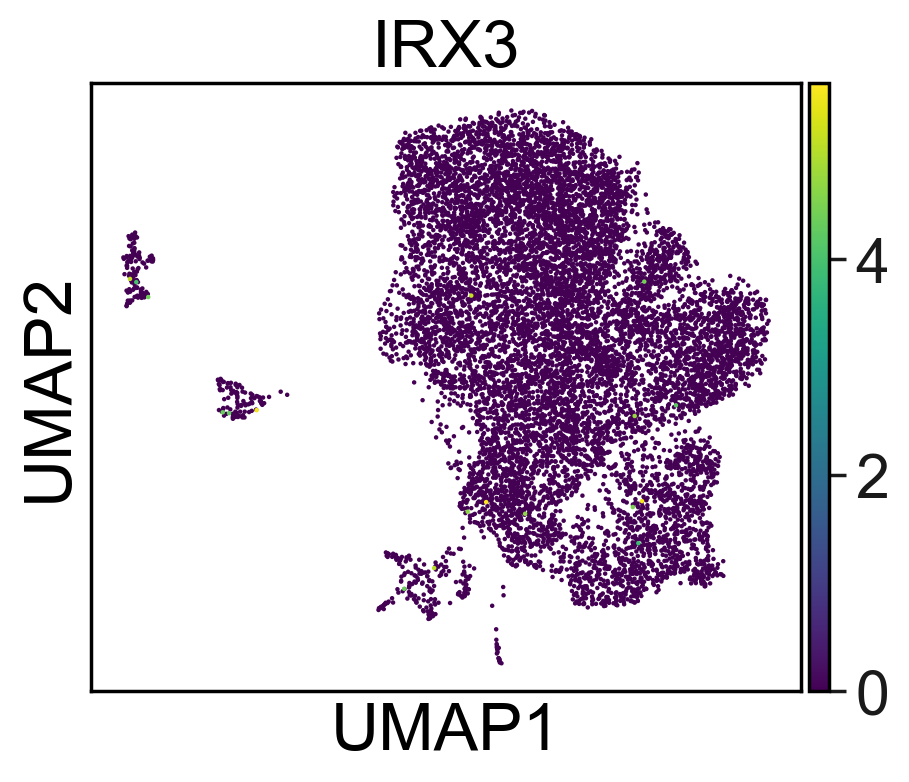

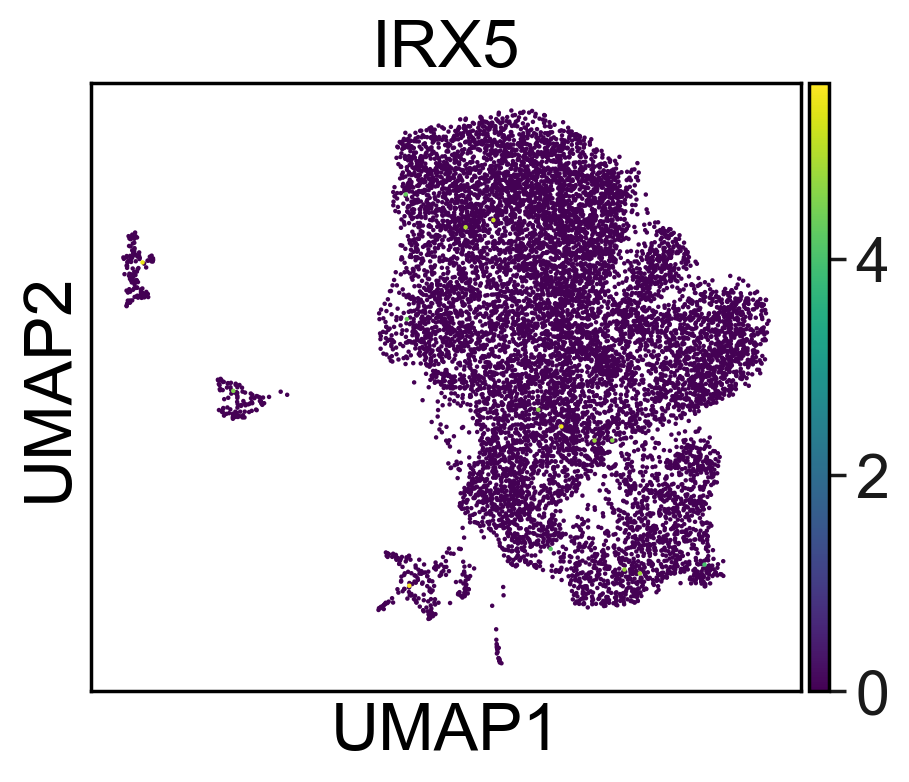

In [32]:
gene_list = ['FOXL2', 'NR5A1', 'AMHR2', 'WT1', 'GATA4', 'RUNX1', 'RUNX2', 'EGFR', 'STS', 'FSHR', 'STAR', 'AMH',
             'KITLG', 'CYP19A1', 'CYP17A1', 'DHH', 'INHA', 'INHBA','WNT4', 'RSPO1', 'CD82', 'CXCL12', 'IGF2',
             'IGFBP7', 'NR2F2', 'TCF21', 'ALDH1A2', 'POU5F1', 'VIM', 'TBXT', 'TBX6', 'FOXF1','OSR1','KRT19',
             'ZFPM2','LGR5','SIX1','SIX4','PBX1','CBX2','LHX9','EMX2','CLDN11','HSD3B2','NR0B1','CDKN1B','GADD45G',
             'FST','BOLL','LHX8','SOHLH1','ZNF281','FIGLA','DAZL','DDX4','SOX17','CD38','REC8','NPM2','STRA8','SYCP3','GDF9','ZP3','XACT']

gene_list += ['XIST','TFAP2C','ZBTB16','SALL4','KIT','SSEA4','THY1','EPCAM','GFRA1','UTF1','NGN3']

gene_list += ['FOXL2','WNT4','PRDM1','PRDM14','NANOG','KIT']



for i in gene_list:
    try:
        sc.pl.umap(adata, color=i, color_map='viridis', legend_fontsize=8, use_raw = True, save='_regress_'+i)
    except Exception as e:
        print(e)
        continue

In [23]:
#gene_list = ['FOXL2', 'NR5A1', 'AMHR2', 'WT1', 'GATA4', 'RUNX1', 'RUNX2', 'EGFR', 'STS', 'FSHR', 'STAR', 'AMH',
#             'KITLG', 'CYP19A1', 'CYP17A1', 'DHH', 'INHA', 'INHBA','WNT4', 'RSPO1', 'CD82', 'CXCL12', 'IGF2',
#             'IGFBP7', 'NR2F2', 'TCF21', 'ALDH1A2', 'POU5F1', 'VIM', 'TBXT', 'TBX6', 'FOXF1','OSR1','KRT19',
#             'ZFPM2','LGR5','SIX1','SIX4','PBX1','CBX2','LHX9','EMX2','CLDN11','HSD3B2','NR0B1','CDKN1B','GADD45G',
#             'FST','BOLL','LHX8','SOHLH1','ZNF281','FIGLA','DAZL','DDX4','SOX17','CD38','REC8','NPM2','STRA8','SYCP3','GDF9','ZP3',
#             'ZBTB16','SALL4','KIT','SSEA4','THY1','EPCAM','GFRA1','UTF1','NGN3','XACT']

gene_list2 = ['DAZL', 'DDX4']

for gene in gene_list2:
    try:
        adata.obs[gene + '+'] = (adata.raw[:,gene].X.todense() > 0)
    except Exception as e:
        print(e)
        print(gene + ' not found')
#adata.obs['DAZL_plus'] = adata.obs['DAZL_plus']#.astype("bool")
adata.obs.to_csv(os.path.join(sc.settings.figdir,"D4_obs.csv"))

In [24]:
#Plot fraction of PGCLCs and DAZL+ cells by day
#PGCLCs are cluster 2 (double-check this if you change the clustering!)


day_df = adata.obs
day_df['PGCLC'] = day_df['leiden'] == '2'
grouped = day_df.groupby("Day").mean()#numeric_only = False)
grouped_plot = grouped['PGCLC']
grouped_plot = grouped[['DAZL+','DDX4+','PGCLC']]
#grouped_plot.rename({'DAZL_plus':'DAZL+','DDX4_plus':'DDX4+'})
grouped_plot.to_csv(os.path.join(sc.settings.figdir,"time_plot.csv"))

In [25]:
grouped_plot

,DAZL+,DDX4+,PGCLC
Day,,,
2,0.002558,0.000000,0.006394
4,0.005208,0.003348,0.028646
8,0.002869,0.002347,0.010433
14,0.005156,0.002109,0.001172


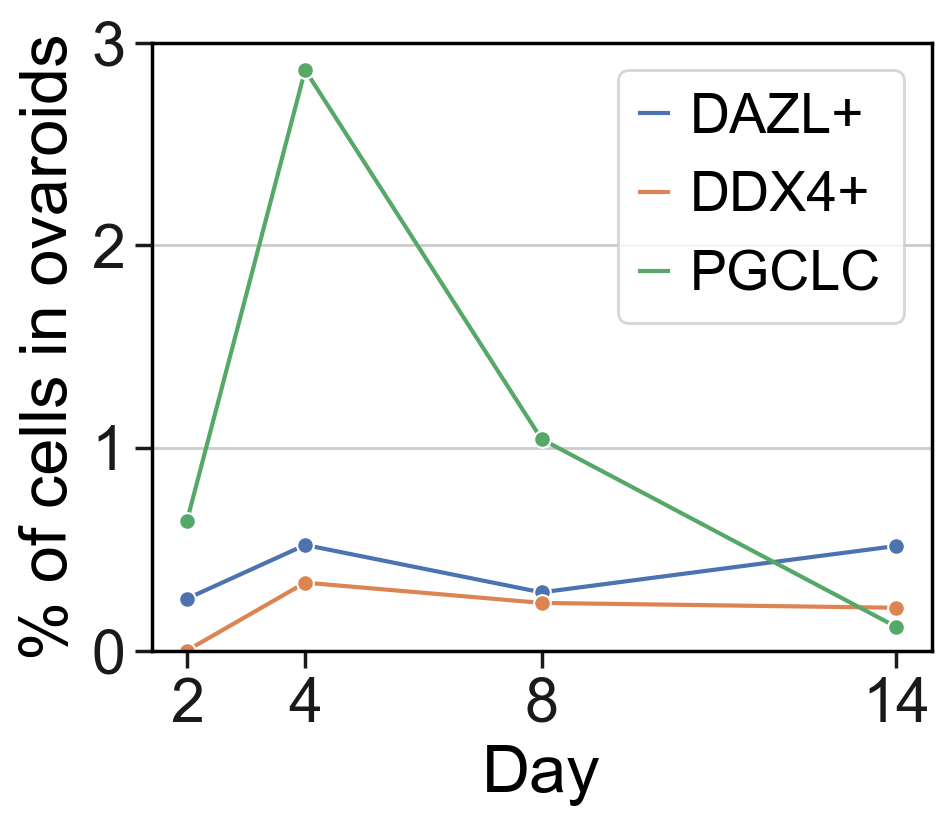

In [26]:
melted = grouped_plot.reset_index().melt(id_vars='Day')
melted['percent'] = melted['value']*100
melted['Cells'] = melted['variable']
melted['Day'] = melted['Day'].astype(int) 

sns.set_theme(font_scale = 2, style = None)
sns.lineplot(data = melted, x = 'Day', y = 'percent', hue = 'Cells', marker = 'o')#, legend = False)
plt.ylim([0,3])
plt.legend(loc='upper right', prop={'size': 20})
plt.xticks([2,4,8,14])
plt.yticks([0,1,2,3])
plt.grid(axis = 'x')
plt.ylabel("% of cells in ovaroids")
plt.savefig(os.path.join(sc.settings.figdir,"ovaroid_time_plot.svg"))
plt.savefig(os.path.join(sc.settings.figdir,"ovaroid_time_plot.png"), dpi = 200, bbox_inches = "tight")

In [27]:
#Rank markers by cluster
#adata.obs['DAZL_plus'] = adata.obs['DAZL_plus'].astype("category")
#sc.tl.rank_genes_groups(adata, 'DAZL_plus', method='t-test')

# The head function returns the top n genes per cluster
#top_markers = pd.DataFrame(adata.uns['rank_genes_groups']['names'])
#print(top_markers)
#top_markers.to_csv("ovaroid_DAZL_plus_top_markers_names.csv")

In [28]:
#pd.DataFrame(adata.X.to_dense()).to_csv("D4_ovaroid_dump.csv")

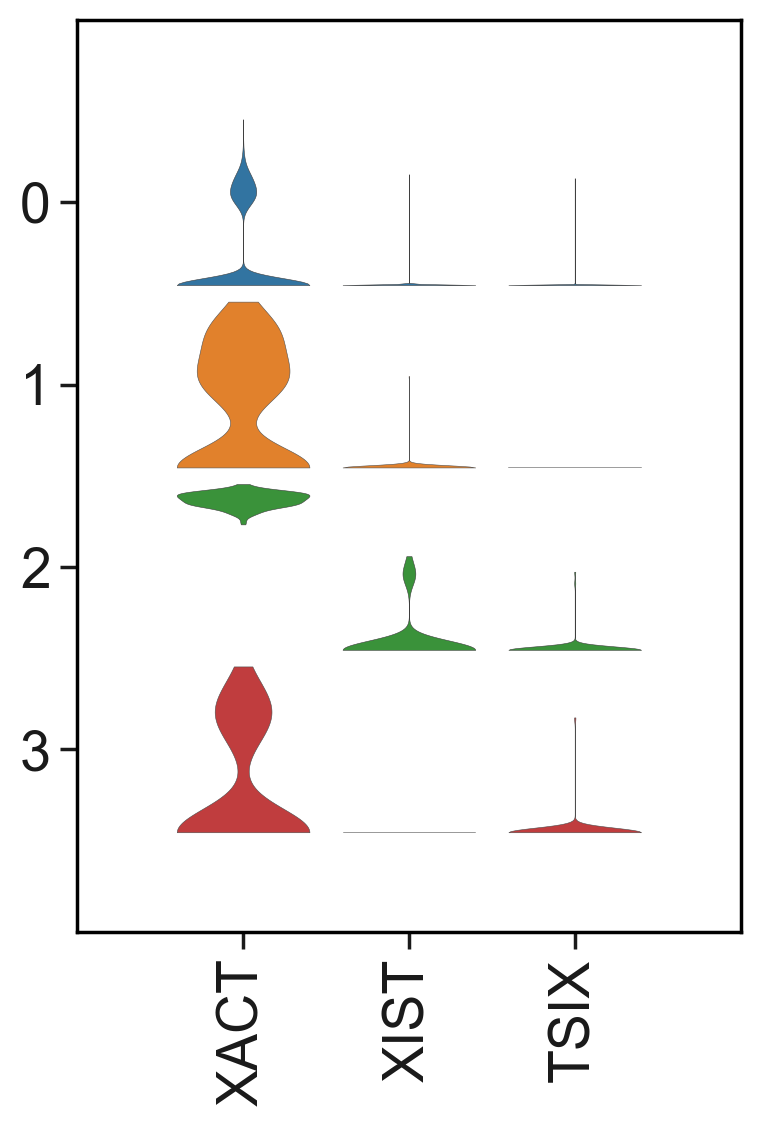

In [29]:
markers = ['XACT','XIST','TSIX']
sc.pl.stacked_violin(adata, markers, groupby='leiden', figsize = (6,6), save = 'ChrX_lncRNA_cluster_violin2.svg', row_palette=sns.color_palette("tab10"))#, stripplot=True, jitter = True)#, use_raw = True)#, dendrogram=True)
#plt.savefig("")

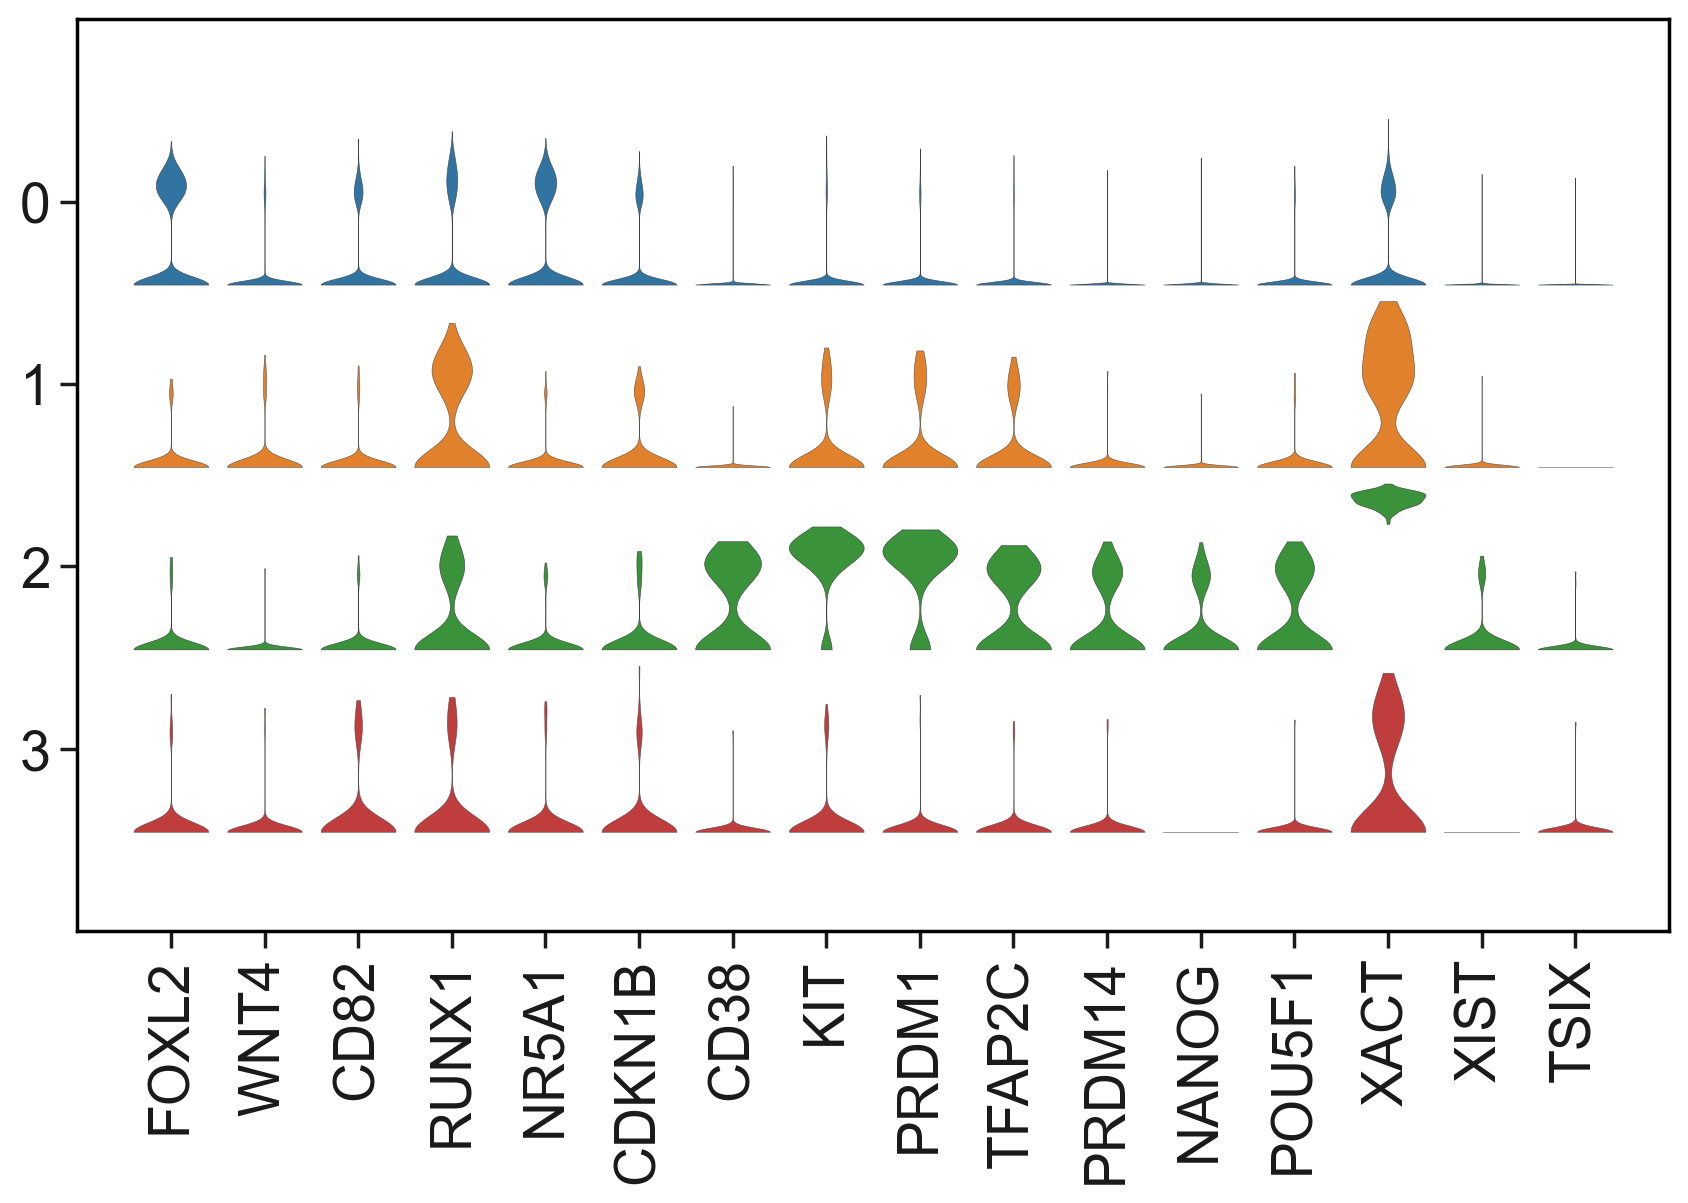

In [30]:
markers = ['FOXL2','WNT4','CD82','RUNX1','NR5A1','CDKN1B',"CD38","KIT", "PRDM1", "TFAP2C", "PRDM14", "NANOG",'POU5F1','XACT','XIST','TSIX']
sc.pl.stacked_violin(adata, markers, groupby='leiden', figsize = (12,6), save = 'genes_cluster_violin_long.svg', row_palette=sns.color_palette("tab10"))#, stripplot=True, jitter = True)#, use_raw = True)#, dendrogram=True)
